In [22]:
# check GPU availability
import tensorflow as tf
print('tf version {}'.format(tf.__version__))
print('Is GPU available {}'.format(tf.test.is_gpu_available()))
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

tf version 1.11.0
Is GPU available True
Found GPU at: /device:GPU:0


In [24]:
# simulate one episode in OpenAI gym
obs, ext_return, done = model.env.reset(), 0., False
n_steps, _return = 0, 0
while not done:
    action = model.action(obs)
    obs, r, done, _ = model.env.step(action)
    _return += r
    n_steps += 1
    model.env.render()
model.env.close()
print(_return, n_steps)

200.0 200


In [5]:
# run one experiment from scratch
%load_ext autoreload
%autoreload 2
import os
from model import Model
from cfg import get_cfg
from utils import get_experiment_name
from utils import dotdict
import tensorflow as tf
tf.reset_default_graph()

experiments_folder = os.path.join(os.getcwd(), 'results')
experiment_name, experiment_folder = get_experiment_name(experiments_folder)

# load default config parameters
cfg_env, cfg_agent = get_cfg(experiment_folder, 'CartPole-v0', 'ppo')
#cfg_env, cfg_agent = get_cfg(experiment_folder, 'four_rooms_maze', 'ppo')
cfg = cfg_env
cfg.update(cfg_agent)
cfg = dotdict(cfg)

# modify default config parameters
cfg.n_batches = 100
cfg.n_episodes = 100
cfg.log_step = 10

# load and train model
model = Model(cfg)
model.train_model()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
ep 10 st 257 ppo e.ret.tr 25.70 e.ret.ts 18.00 ag.ls -9.75 bs.ls 222.91 
ep 20 st 444 ppo e.ret.tr 22.20 e.ret.ts 19.00 ag.ls -8.68 bs.ls 177.85 
ep 30 st 705 ppo e.ret.tr 22.40 e.ret.ts 14.00 ag.ls -8.40 bs.ls 184.62 
ep 40 st 895 ppo e.ret.tr 22.55 e.ret.ts 29.00 ag.ls -8.38 bs.ls 178.28 
ep 50 st 1107 ppo e.ret.tr 20.10 e.ret.ts 26.00 ag.ls -7.72 bs.ls 128.37 
ep 60 st 1329 ppo e.ret.tr 21.70 e.ret.ts 17.00 ag.ls -8.24 bs.ls 151.03 
ep 70 st 1633 ppo e.ret.tr 26.30 e.ret.ts 15.00 ag.ls -9.01 bs.ls 249.99 
ep 80 st 1838 ppo e.ret.tr 25.45 e.ret.ts 11.00 ag.ls -8.43 bs.ls 228.20 
ep 90 st 2188 ppo e.ret.tr 27.75 e.ret.ts 10.00 ag.ls -9.16 bs.ls 256.32 
ep 100 st 2367 ppo e.ret.tr 26.45 e.ret.ts 35.00 ag.ls -8.91 bs.ls 241.59 


0.0 20.0 12


<IPython.core.display.Javascript object>


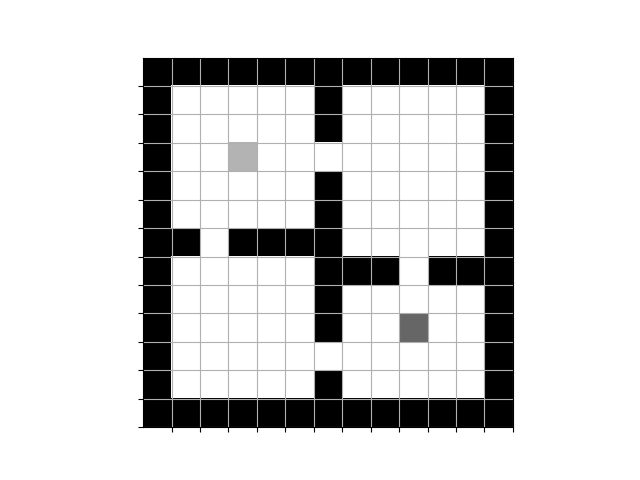

In [26]:
# simulate one maze episode 
import matplotlib 
%matplotlib nbagg
ext_return, n_steps, obs_list = model.simulate()
print(ext_return, n_steps, len(model.env.visited))
model.env.animate(obs_list)